<a href="https://colab.research.google.com/github/Bharathyramakrishnan/Applied-Generative-AI-Specialization/blob/main/E2E_DS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understand the business problem
* Define objective
* How will DS/ML's solution be used?
* What solutions are there in place?
* How will you measure performance?
    * Effectiveness (predictive performance)
    * Efficiency (runtime)
* Minimum performance required?
* Metrics presented to key stakeholders

**IMPORTANT NOTE:** This is the most important step of the DS/ML project lifecycle. Make sure you define performance metrics and targets.
https://docs.google.com/document/d/1kULWC_6BQH9iisIlflGx_teGxC1t6j3jvp-TosbZRvA/edit

# 2. Prepare your DS/ML environment

*Why is this step relevant?*

It minimizes the risk of libary conflicts when sharing your project.

https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

In [ ]:
# Using conda
# The use of ! will allow you to run terminal commands from your notebook

# Option 1: Create new environment from scratch
# NOTE: ipykernel is used only to select kernel in jupyter lab or jupyter notebook
!conda create -y -n envname python ipykernel
!conda activate envname

# Create environment yaml file
!conda env export > filename.yaml

# Option 2: Create environment from yaml file
!conda create -f flename.yaml

# Option 3: Update an existing enviromment from a yaml file
!conda env update envname -f filename.yaml


# 3. Get data

* Find data and document sources
* Check for space
>* If RAM > datafile size, then do batch training
>* If RAM < datafile size, sample or do online training

* Check  terms, conditions and regulations
* If applicable: get access
* Create workspace / define storage location
* Get data
* Deal with sensitive information (delete, protect, anonymize)
* Sample data


In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Visit https://ipython.readthedocs.io/en/stable/interactive/plotting.html for information on %matplotlib

import seaborn as sns

# Hide warnings if you are presenting your project to an audience to make your code look cleaner
import warnings
warnings.filterwarnings("ignore")
# Visit https://docs.python.org/3/library/warnings.html for information on warning control

In [ ]:
# Option 1a: Import data from csv
df = pd.read_csv("filename.csv")

# Option 1b: Import data from excel
df = pd.read_excel("filename.xlsx")

# Option 2: Import data from database
import pyodbc

# Define connector to database
driver = 'SQL Server'
server = 'servername or ip address'
database = 'mydb'
username = 'myusername' #os.environ['db_usr']
password = 'mypassword' #os.environ['db_pwd']
table = 'mytable'

connector = pyodbc.connect('DRIVER={'+driver+'};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)

# Define query
query = 'SELECT * FROM '+table

# Import query results into DataFrame
df = pd.read_sql(query, connector)

# Visit https://github.com/mkleehammer/pyodbc/wiki to learn more about pyobdc and its available drivers

In [ ]:
# Option 3: Import data via API calls

# Import requests

import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Apple&'
       'from=2024-04-30&'
       'sortBy=popularity&'
       'apiKey=your_api_key' ) #os.environ['newsapi_key']

response = requests.get(url)


In [ ]:
response.json()

In [ ]:
# Option 4: Web scrapping
#TODO: web scrapping example

[Data collection and data sampling examples](https://colab.research.google.com/drive/1KyG5XAKGE7srT49AjemM1oLpF_1WE7wA?authuser=1#scrollTo=UeMoSDqUjp8S)

# 4. Explore data to gain insights

Look for:
* Target variable (for supervised learning)
* Is your dataset imbalanced? (for classification)
* Size of dataset (to ensure if fits in memory)
* Number of variables (to estimate model complexity and processing)
* Variable data types (important for choosing hypothesis tests, [visualizations](https://www.data-to-viz.com/) and [transformations] (https://feature-engine.trainindata.com/)
* Missing values
* Cardinality (categorical variables)
* Rare values (categorical variables)
* Distributions (skewness/kurtosis)
* Normality tests
* Scale
* Outliers
* Correlations (pay particular attention in correlations with target variable)
    - Pearson (numerical-unordered-gaussian)
    - Spearman (numerical-ordered or unordered-not gaussian)
    - Kendall-Tau (numerical-ordered-not gaussian)
    - Cramer's V (categorical)
* Hypothesis testing

**Note:** the main outputs of this phase will be:
- Data quality assessment
- Insights
- [Potential algorithms](https://colab.research.google.com/drive/1-LpWmCj1ZnGpwm4nDcqITFCABDy1-k63?authuser=1)
- Feature engineering and selection strategies


In [ ]:
## Size, variables and dtypes
df.info(memory_usage='deep')

In [ ]:
# Missing values
df.isnull().mean().sort_values(ascending=False)

In [ ]:
# Cardinality
df.describe(include='O')

When performing feature selection, you can feel safe to remove variables that meet the following conditions:
* Cardinality >= 95% of observations
* Cardinality == 1 (this means you have a constant categorical *variable*)

In [ ]:
# Rare values (for categorical ONLY)
df.value_counts()

In [ ]:
# Distributions, scale, and outliers
df.describe()
# For distributions, look for differences in mean vs std vs percentiles
# For scale, look for different orders of magnitud between variables' min/max

# Distributions only (for outliers, values further away from zero indicate more extreme outliers)
df.skew().sort_values(ascending=False)
df.kurt().sort_values(ascending=False)

Normality tests

In [ ]:
import pandas as pd
from scipy.stats import shapiro

In [ ]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
statistic, p_value = shapiro(data['housing_median_age'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
statistic

0.9781268835067749

In [ ]:
p_value

1.5414283107572988e-44

<Axes: ylabel='Frequency'>

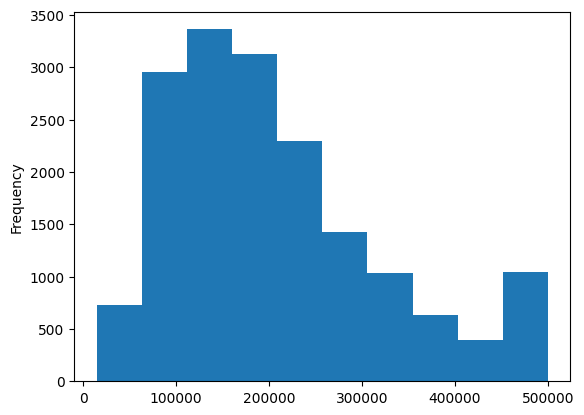

In [ ]:
data['median_house_value'].plot(kind='hist')

In [ ]:
statistic, p_value = shapiro(data['median_income'])
print(f"Median income normality statistic: {statistic}")
print(f"Median income normality p-value: {p_value}")

Median income normality statistic: 0.8942043781280518
Median income normality p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Axes: ylabel='Frequency'>

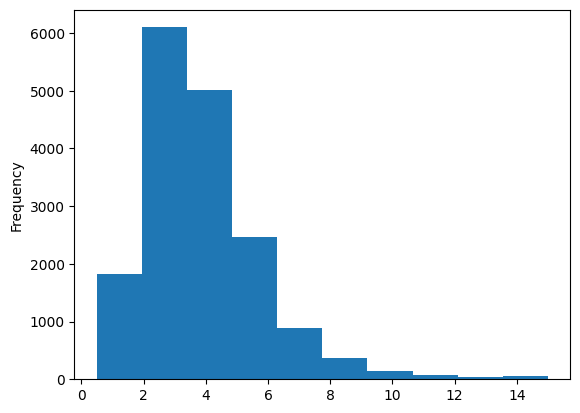

In [ ]:
data['median_income'].plot(kind='hist')

In [ ]:
# Numerical Correlations
df.corr()

In [ ]:
# Categorical Correlations
# V-Cramer's

# 5. Prepare your data (*create transformers' pipeline*)

## *Important notes:*
1. Split your dataset in train and test before applying any fit method.
2. fit ONLY training data
3. Transform both train and test


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Target'])
y = df['Target']

# For the larger the dataset, the smaller the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 5.1 Feature engineering
* Missing values
* Label encoding
* Variance stabilizing
* Outlier handling
* Scaling
* Dimensionality reduction

Deliverable:
- Feature engineering script(s)


Handling missing values:
https://feature-engine.readthedocs.io/en/latest/imputation/index.html

In [ ]:
# Numerical missing values. Use median for skewed data and mean for gaussian distributions

from feature_engine.imputation import MeanMedianImputer
num_imputer = MeanMedianImputer()

# Categorical missing values will replace NaN with Missing
from feature_engine.imputation import CategoricalImputer
cat_imputer = CategoricalImputer(value='Missing')


Categorical encoders: https://feature-engine.readthedocs.io/en/latest/encoding/index.html


In [ ]:
# Rare label encoder for high cardinality variables where there may be elements in test but not in train. Will replace values with Rare
from feature_engine.encoding import RareLabelEncoder
rare_encoder = RareLabelEncoder(replace_with='Rare')

# Select the best encoder based on your use case and dataset. If you are unsure, try OrdinalEncoder
from feature_engine.encoding import OrdinalEncoder
cat_encoder = OrdinalEncoder()

Handling outliers: https://feature-engine.readthedocs.io/en/latest/outliers/index.html

In [ ]:
# Winsorizer() caps maximum and / or minimum values of a variable

from feature_engine.outliers import Winsorizer
capper = Winsorizer(capping_method='iqr', tail='both', fold=1.5)

Data scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
# The most popular scalers are StandardScaler and RobustScaler. More info in the link above

# Recommended use of sklearn wrapper to continue working with DataFrames
from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
scaler = SklearnTransformerWrapper(transformer = RobustScaler())

Dimensionality reduction with PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Use n_components < 1 for explained variance sum and n_components > 1 for specific number of components to keep
# Besides PCA you can also try LDA, tSNE, IsoMap, etc.

from sklearn.decomposition import PCA
dim_red = SklearnTransformerWrapper(transformer = PCA(n_components=0.95))

## 5.2 Feature selection
https://scikit-learn.org/stable/modules/feature_selection.html

https://feature-engine.readthedocs.io/en/latest/selection/index.html

In [ ]:
# Basic feature selection: remove constant, quasi-constant and duplicate variables

from feature_engine.selection import DropConstantFeatures
cons_features = DropConstantFeatures(tol=0.95)

from feature_engine.selection import DropDuplicateFeatures
duplicates = DropDuplicateFeatures()

In [ ]:
# Correlated feature selection (colinearity)

# Change scoring, selection_method, and estimator when applicable
from feature_engine.selection import SmartCorrelatedSelection
corr_features = SmartCorrelatedSelection(selection_method="variance",estimator=None)

For wrapper algorithms (Forward selection, backward selection, exhaustive search) refer to:
* Forward/backward selection: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
* Exhaustive search: http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

*NOTE: Wrapper methods are computationally greedy and require a model to be tried on.*

In [ ]:
# Embedded feature selection with sklearn.feature_selection.SelectFromModel

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

Hybrid feature selection techniques:
* **SelectByShuffling**: selects features by determining the drop in machine learning model performance when each feature’s values are randomly shuffled
* **RecursiveFeatureElimination** and RecursiveFeatureAddition: selects features following a recursive process


In [ ]:
# Shuffle selector depends on a model to train

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from feature_engine.selection import ShuffleFeaturesSelector
shuffle_selector = SelectByShuffling(estimator=model, scoring="r2", cv=3)

In [ ]:
# RecursiveFeatureElimination depends on a model to train

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from feature_engine.selection import RecursiveFeatureElimination
recursive_selector = RecursiveFeatureElimination(estimator=model, scoring="r2", cv=3)

## 5.3 Create your transformer pipeline


In [ ]:
# Import make_pipeline
from sklearn.pipeline import make_pipeline

# Define pipeline steps
transformer_pipe = make_pipeline(num_imputer,
                                 cat_imputer,
                                 rare_encoder,
                                 cat_encoder,
                                 capper,
                                 scaler,
                                 cons_features,
                                 duplicates,
                                 corr_features,
                                 recursive_selector,
                                 dim_red,
                                 )

#fit and transform
X_train = transformer_pipe.fit_transform(X_train, y_train)
X_test = transformer_pipe.transform(X_test, y_test)

# Save pipeline in pickle file
import pickle

with open ('transformer_pipeline.pkl', 'wb') as name:
  pickle.dump(transformer_pipe, name)

# 6. Try different algorithms
(https://mlflow.org/ can be used to track models’ performance and hyper parameters)
* Try default hyperparameters first (unless you have good notion on what hyperparams will improve performance and their values)
* Measure and compare performance
* Short-list top 1-3 models for hyperparameter tuning


In [ ]:
# Import algorithms to try

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from tpot import TPOTRegressor
from catboost import CatBoostRegressor

In [ ]:
# Create table with models and its performance
# IMPORTANT NOTE: change metrics and algorithms as you see fit

# Define algorithms to try
algorithms = []
algorithms.append(('ElasticNet', ElasticNet()))
algorithms.append(('Random Forest', RandomForestRegressor()))
algorithms.append(('XG Boost', XGBRegressor()))
algorithms.append(('LightGBM', LGBMRegressor()))
#algorithms.append(('Genetic', TPOTRegressor()))
algorithms.append(('CatBoost', CatBoostRegressor()))

# Initialize lists
names = []
train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []
cross_validation_scores = []
runtime = []

# Iterate ofer each element in algorithms
for name, reg in algorithms:
  t1 = time.time()
  names.append(name)
  reg.fit(X_train, y_train)
  train_rmse.append(mean_squared_error(y_train, reg.predict(X_train), squared=False))
  test_rmse.append(mean_squared_error(y_test, reg.predict(X_test), squared=False))
  train_r2.append(r2_score(y_train, reg.predict(X_train)))
  test_r2.append(r2_score(y_test, reg.predict(X_test)))
  cross_validation_scores.append(cross_val_score(reg, np.vstack((X_train, X_test)), np.hstack((y_train, y_test))).mean())
  t2 = time.time()
  runtime.append(t2-t1)

# Create comparison dataframe
model_comparison = pd.DataFrame({'Algorithm': names,
                                 'Train RMSE': train_rmse,
                                 'Test_RMSE': test_rmse,
                                 'Train r2 score': train_r2,
                                 'Test r2 score': test_r2,
                                 'Cross validation score': cross_validation_scores,
                                 'Runtime': runtime,})

# Sort by Test_RMSE
model_comparison.sort_values(by=['Test_RMSE'])

# 7. Hyper parameter tuning
* GridSearch
* RandomSearch
* Bayesian search
* Genetic Search

  - Tensorboard
  - MLFlow

# Model explainability

- SHAP
- LIME

https://christophm.github.io/interpretable-ml-book/

TODO: include agentic architectures

# Model Deployment and tracking (MLOps)

- Deployment (FastAPI, Flask, Django, GCP, AWS, Azure, Databricks etc.)
- Tracking (W&B, MLFlow)

In [ ]:
#Part 1: train and save the model

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Save de mnodel to a file
joblib.dump(model, 'iris_model.pkl')

['iris_model.pkl']

In [ ]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Part 2: Create a FastAPI Application
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

#Initialize the FastAPI app
app = FastAPI()

# Load the trained model
model = joblib.load('iris_model.pkl')

#Define input data with Pydantic
class IrisInput(BaseModel):
    sepal_length: float
    sepal_width: float
    petal_length: float
    petal_width: float

#Define the prediction endpoint
@app.post('/predict')
def predict_iris(iris_data: IrisInput):
    # Extract input data and convert to a numpy array
    input_data = np.array([iris_data.sepal_length,
                           iris_data.sepal_width,
                           iris_data.petal_length,
                           iris_data.petal_width])
    #Make prediction
    prediction = model.predict([input_data])

    # Map the numeric prediction with the class name
    class_names = iris.target_names
    predicted_class = class_names[prediction[0]]

    return {'predicted_class': predicted_class}

# Define a basic root endpoint for testing

@app.get('/')
def read_root():
    return {'message': 'Welcome to the Iris model prediction API!'}

if __name__ == '__main__':
    import uvicorn
    uvicorn.run(app, host='localhost', port=8000)

In [ ]:
#Part 3: Run FastAPI app

%python app.py

In [ ]:
# Part 4: Test endpoint

import requests

url = 'http://localhost:8000/predict'

# Create input data

input_data = {
    'sepal_length': 5.1,
    'sepal_width': 3.5,
    'petal_length': 1.4,
    'petal_width': 0.2
}

# Send POST request

response = requests.post(url, json=input_data)

# Print response

print(response.json())